In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

In [3]:
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)


Saving Parkison plain data.csv to Parkison plain data.csv


In [4]:
df = data

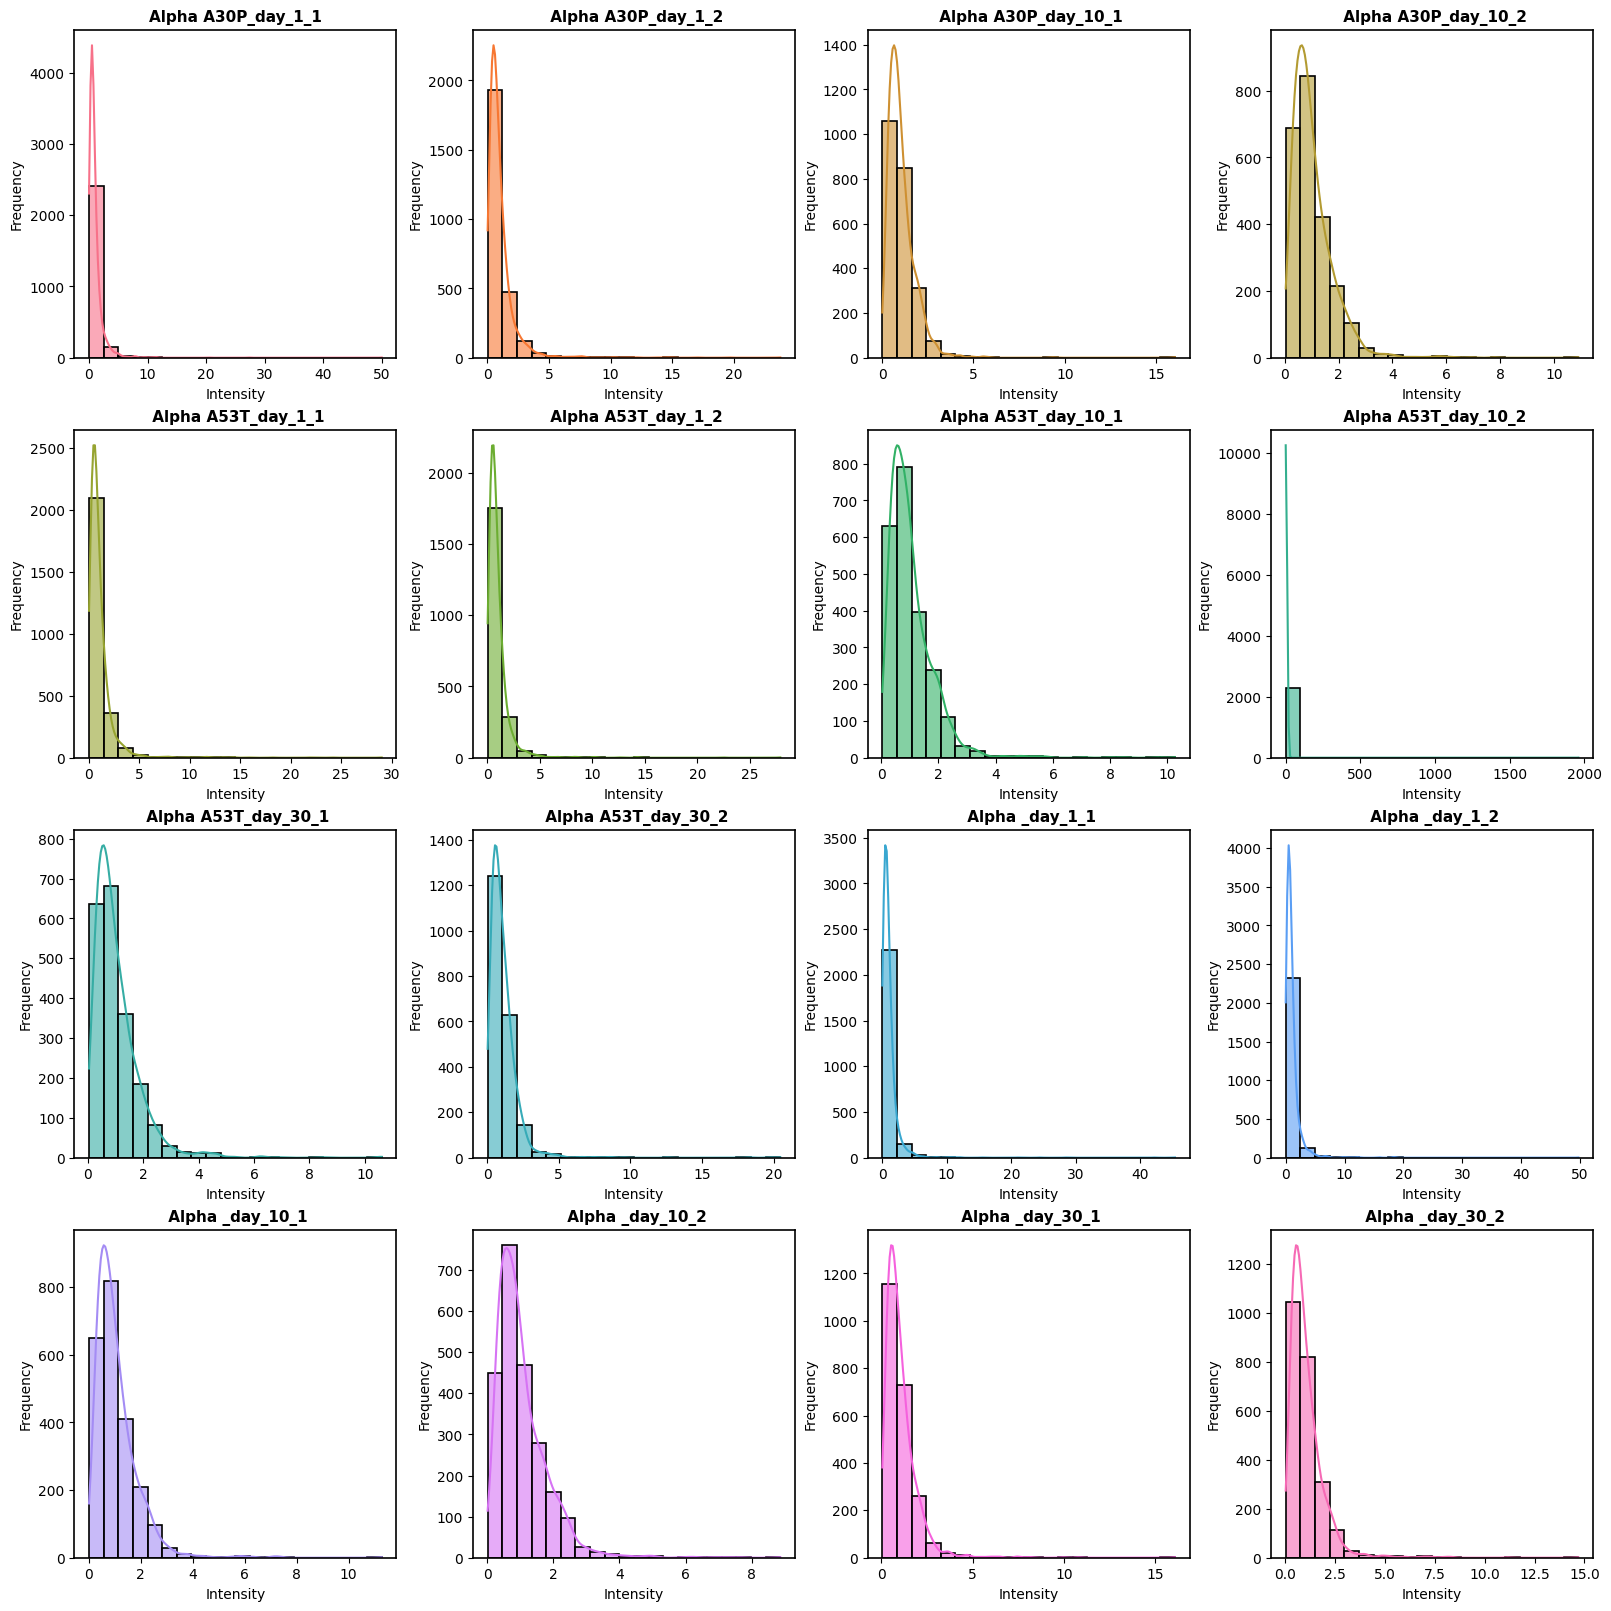

In [5]:
# Define the conditions
conditions = df.columns.tolist() # Dynamically get all column names from df
num_conditions = len(conditions)

# Define your custom color palette, or generate one if more colors are needed
# Using a qualitative palette that can generate many distinct colors
colors = sns.color_palette('husl', n_colors=num_conditions)

# Calculate optimal grid size for subplots
n_cols = 4 # Number of columns in the grid
n_rows = (num_conditions + n_cols - 1) // n_cols # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 4), constrained_layout=True)
axes = axes.flatten()

# Plot each histogram
for i, (col, color) in enumerate(zip(conditions, colors)):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i], color=color, alpha=0.6, linewidth=1.2)
    axes[i].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Intensity', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(False)
    for spine in axes[i].spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.2)

# Remove unused subplots (in case fewer conditions than axes)
for j in range(num_conditions, len(axes)):
    fig.delaxes(axes[j])

# Save high-resolution images
png_path = 'Histogram_600dpi.png'
pdf_path = 'Histograml.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)
plt.show()